## Multilayer Perceptron using pytorch

This notebook implements a multilayer perceptron using pytorch and does predictions on the ecoli dataset. 

View the dataset [here.](https://archive.ics.uci.edu/dataset/39/ecoli)

In [78]:
# Install the required dependencies
!pip install torch
!pip install pandas
!pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\kjell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\kjell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\kjell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
# Basic imports
import torch
import torch.nn as nn
import torch.nn.functional as F

### Defining the model

This class defines the model that is used in predictions.
The model has two fully connected hidden layers and uses the sigmoid activation function.

In [2]:
# Inherits from nn.Module
class NeuralNetwork(nn.Module):

    # Input layers (x features) -> Hidden layer 1 (y neurons) -> Hidden layer 2 (z neurons) -> Output layers (n classes)

    def __init__(self, input_features, hidden_layer1, hidden_layer2, output_features):
        super().__init__()                                      # super() = nn.Module
        self.fc1 = nn.Linear(input_features, hidden_layer1)     # fc = fully connected layer
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)      # fc = fully connected layer
        self.out = nn.Linear(hidden_layer2, output_features)    # out = output layer

    def forward(self, x):
        x = self.fc1(x)
        x = F.sigmoid(x)       # sigmoid = activation function
        x = self.fc2(x)
        x = F.sigmoid(x)       # sigmoid = activation function
        x = self.out(x)
        return x

### Preparing the data for training

In order to prepare the data for training, only the "cp" and "im" classes are included. (Because of the assignment)
The first column of the data is a label column, that does not contain any that can be used in training. This column are removed.
The classes "cp" and "im" are transformed into the numbers 0 and 1 respectivly.

In [3]:
import pandas as pd

# Read the data
df = pd.read_csv('./data/ecoli.data', header=None, delim_whitespace=True)

# We only want the data that are classified as 'cp' or 'im'
included_classes = ["cp", "im"]

# Exclude all classes (column 8) that are not 'cp' or 'im'
df = df[df[8].isin(included_classes)]

# Remove the first column (sequence name)
df = df.drop(df.columns[0], axis=1) # axis=1 means column and axis=0 means row

# Change the class names to numbers
df = df.replace("cp", 0)
df = df.replace("im", 1)


# Print the first 5 rows
df.head()

,1,2,3,4,5,6,7,8
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0


In [16]:
from sklearn.model_selection import train_test_split

# Here we want to drop the class column (column 7) from the data
X = df.drop(df.columns[7], axis=1).values # axis=1 means column and axis=0 means row

# Here we want to get the class column (column 7) from the data
y = df[7].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Convert features into float tensors (PyTorch doesn't accept numpy arrays)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert labels into int tensors (PyTorch doesn't accept numpy arrays)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)


### Training the model

The model is instantiated with 7 input features (based on the dataset) and the two layers consists of eight neurons each.
The number of output features are 1 (cp or im).

Mean Square loss is used to measure the loss of the model.

After trying different learning rates, the learning rate is set to 0.001.

In [30]:
# Pick a random seed for randomization
torch.manual_seed(42)

model = NeuralNetwork(input_features=7, hidden_layer1=8, hidden_layer2=8, output_features=1)

# Model to measure error (how far the predictions are from the actual values)
criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [31]:
epochs = 1000

losses = []


for epoch in range(epochs):

    # For each epoch, we want to get the predicted y values
    pred = model.forward(X_train)

    # Calculate the loss/error
    loss = criterion(pred, y_train)

    # Store the loss/error
    losses.append(loss)

    if epoch % 10 == 0:
        print(f'Epoch: {epoch} Loss: {loss}')

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 0.985592246055603
Epoch: 10 Loss: 0.8855490684509277
Epoch: 20 Loss: 0.7962624430656433
Epoch: 30 Loss: 0.7165371179580688
Epoch: 40 Loss: 0.645319402217865
Epoch: 50 Loss: 0.5816780924797058
Epoch: 60 Loss: 0.5247886776924133
Epoch: 70 Loss: 0.47392067313194275
Epoch: 80 Loss: 0.4284254312515259
Epoch: 90 Loss: 0.3877270221710205
Epoch: 100 Loss: 0.35131287574768066
Epoch: 110 Loss: 0.31872692704200745
Epoch: 120 Loss: 0.28956276178359985
Epoch: 130 Loss: 0.2634579837322235
Epoch: 140 Loss: 0.24008935689926147
Epoch: 150 Loss: 0.2191683053970337
Epoch: 160 Loss: 0.20043715834617615
Epoch: 170 Loss: 0.18366575241088867
Epoch: 180 Loss: 0.16864830255508423
Epoch: 190 Loss: 0.15520086884498596
Epoch: 200 Loss: 0.14315883815288544
Epoch: 210 Loss: 0.13237518072128296
Epoch: 220 Loss: 0.12271815538406372
Epoch: 230 Loss: 0.11406990885734558
Epoch: 240 Loss: 0.10632503032684326
Epoch: 250 Loss: 0.09938913583755493
Epoch: 260 Loss: 0.09317769855260849
Epoch: 270 Loss: 0.087615

Text(0.5, 0, 'Epoch')

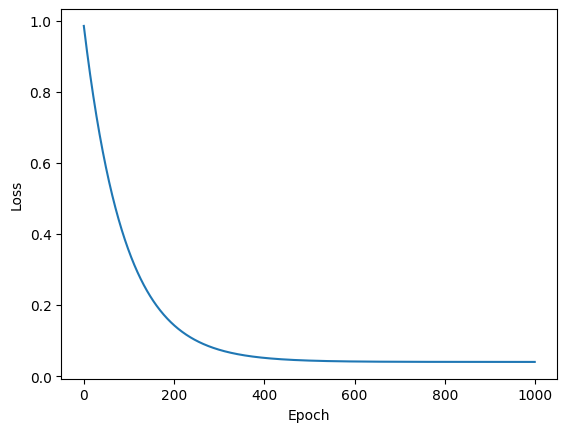

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

losses_as_numbers = [loss.item() for loss in losses]

plt.plot(range(epochs), losses_as_numbers)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [34]:
# Evaluate the model accuracy
with torch.no_grad(): # Turn of backpropagation so that evaluation does not affect the model
    y_eval = model.forward(X_test) # Get the predicted y values
    loss = criterion(y_eval, y_test) # Calculate the loss/error

print(f'Loss: {loss}')

Loss: 0.046323683112859726
